# Practice: Outliers, Missing Values, Imbalanced Data, and Categorical Encoding

## Instructions:
In this exercise, you will work with the Titanic dataset to practice various data preprocessing techniques. Follow the steps below to complete the tasks.

### Dataset:
- Load the Titanic dataset to begin the analysis.

---

## Concepts Overview:

### Outliers:
Outliers are data points that differ significantly from other observations in the dataset. They can skew and mislead statistical analyses, so identifying and handling them is important.

### Missing Values:
Missing values occur when no data value is stored for a feature in an observation. Handling missing data appropriately is crucial, as many machine learning algorithms do not work well with missing values.

### Imbalanced Data:
Imbalanced data refers to datasets where the distribution of classes is not equal. This is particularly problematic in classification tasks, as models tend to be biased towards the majority class.

### Categorical Encoding:
Categorical encoding is the process of converting categorical data into numerical values that machine learning algorithms can process. This can be done using techniques such as label encoding, one-hot encoding, or frequency encoding.

---

## Part 1: Detecting and Handling Outliers
1. **Select Two Columns:**
   - Choose two numerical columns from the dataset that you want to work on for outlier detection.
   
2. **Visualize the Data:**
   - Create a scatter plot or box plot to visualize the points in the selected columns.
   
3. **Outlier Detection:**
   - Apply at least two different techniques to detect outliers.

---

## Part 2: Handling Missing Values
1. **Check for Missing Values:**
   - Inspect the dataset and check how many missing values are present in each column.
   
2. **Imputation:**
   - Select a column that contains missing values.
   - Apply **three different imputation techniques** to handle the missing values. For example:
     - **Mean Imputation:** Replacing missing values with the mean of the column.
     - **Median Imputation:** Replacing missing values with the median value, which is less affected by outliers.
     - **Mode Imputation:** Replacing missing values with the most frequent value in the column.

---

## Part 3: Handling Imbalanced Data
1. **Check Class Balance:**
   - Are the classes in your target variable balanced? Analyze the distribution of the target class (e.g., Survival).
   
2. **SMOTE for Class Balancing:**
   - Apply the **SMOTE (Synthetic Minority Over-sampling Technique)** to balance the class distribution. SMOTE generates synthetic samples for the minority class by interpolating between existing minority class examples.
   - Visualize the class distribution before and after applying SMOTE.

---

## Part 4: Categorical Encoding
1. **Select a Categorical Column:**
   - Choose a categorical column (e.g., 'Sex', 'Embarked') that you want to work on.
   
2. **Apply Categorical Encoding:**
   - Apply at least **two different encoding techniques** on the selected column. For example:
     - **Label Encoding:** Converts categorical labels into numeric values by assigning a unique number to each class.
     - **Frequency Encoding:** Assigns each category a value based on its frequency in the dataset.
   
3. **One-Hot Encoding:**
   - Apply **One-Hot Encoding** on the categorical column. This technique creates binary columns for each category, with a '1' representing the presence of the category and '0' for its absence.
---


PART 1 :

Select 2 columns

In [ ]:
!pip install imblearn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from imblearn.over_sampling import SMOTE # Changed SMOT to SMOTE


# Load the dataset
gym = pd.read_csv('/content/titanic - titanic.csv')

# Select the two columns for outlier detection
df = gym[['PassengerId', 'Survived']].dropna()

df

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,0
889,890,1


VIZUALISE THE DATA

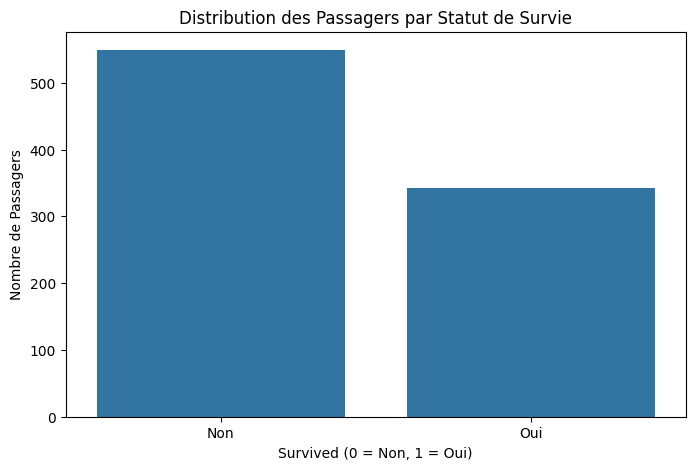

In [ ]:
plt.figure(figsize=(8, 5))

# Count plot pour visualiser la distribution de 'Survived'
sns.countplot(x='Survived', data=df)
plt.title('Distribution des Passagers par Statut de Survie')
plt.xlabel('Survived (0 = Non, 1 = Oui)')
plt.ylabel('Nombre de Passagers')
plt.xticks([0, 1], ['Non', 'Oui'])
plt.show()

Outlier

In [ ]:

unique_passenger_ids = df['PassengerId'].unique()
unique_survival_values = df['Survived'].unique()

print("Valeurs uniques dans 'PassengerId':", unique_passenger_ids)
print("Valeurs uniques dans 'Survived':", unique_survival_values)


outliers_passenger_id = df[df['PassengerId'] < 0]


print("Outliers potentiels dans 'PassengerId' :")
print(outliers_passenger_id)

Valeurs uniques dans 'PassengerId': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 23

Part 2: Handling Missing Values
Check for Missing Values:

Inspect the dataset and check how many missing values are present in each column.
Imputation:

Select a column that contains missing values.
Apply three different imputation techniques to handle the missing values. For example:
Mean Imputation: Replacing missing values with the mean of the column.
Median Imputation: Replacing missing values with the median value, which is less affected by outliers.
Mode Imputation: Replacing missing values with the most frequent value in the column.


In [ ]:
missing_values = gym.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values[missing_values > 0])  # Afficher uniquement les colonnes avec des valeurs manquantes

# Sélectionner une colonne avec des valeurs manquantes (par exemple, 'Age')
age_missing = gym['Age'].isnull().sum()
print(f"\nNombre de valeurs manquantes dans 'Age': {age_missing}")

Valeurs manquantes par colonne :
Age         177
Cabin       687
Embarked      2
dtype: int64

Nombre de valeurs manquantes dans 'Age': 177


In [ ]:
# 1. Mean
mean_age = gym['Age'].mean()
gym['Age_mean_imputed'] = gym['Age'].fillna(mean_age)
print("\nImputation par la moyenne :")
print(gym[['Age', 'Age_mean_imputed']].head())

# 2. Median
median_age = gym['Age'].median()
gym['Age_median_imputed'] = gym['Age'].fillna(median_age)
print("\nImputation par la médiane :")
print(gym[['Age', 'Age_median_imputed']].head())

# 3. Mode
mode_age = gym['Age'].mode()[0]  # Le mode peut retourner plusieurs valeurs, donc nous prenons le premier
gym['Age_mode_imputed'] = gym['Age'].fillna(mode_age)
print("\nImputation par le mode :")
print(gym[['Age', 'Age_mode_imputed']].head())


Imputation par la moyenne :
    Age  Age_mean_imputed
0  22.0              22.0
1  38.0              38.0
2  26.0              26.0
3  35.0              35.0
4  35.0              35.0

Imputation par la médiane :
    Age  Age_median_imputed
0  22.0                22.0
1  38.0                38.0
2  26.0                26.0
3  35.0                35.0
4  35.0                35.0

Imputation par le mode :
    Age  Age_mode_imputed
0  22.0              22.0
1  38.0              38.0
2  26.0              26.0
3  35.0              35.0
4  35.0              35.0


Part 3: Handling Imbalanced Data
Check Class Balance:

Are the classes in your target variable balanced? Analyze the distribution of the target class (e.g., Survival).
SMOTE for Class Balancing:

Apply the SMOTE (Synthetic Minority Over-sampling Technique) to balance the class distribution. SMOTE generates synthetic samples for the minority class by interpolating between existing minority class examples.
Visualize the class distribution before and after applying SMOTE.

Distribution des classes avant SMOTE :
Survived
0    549
1    342
Name: count, dtype: int64


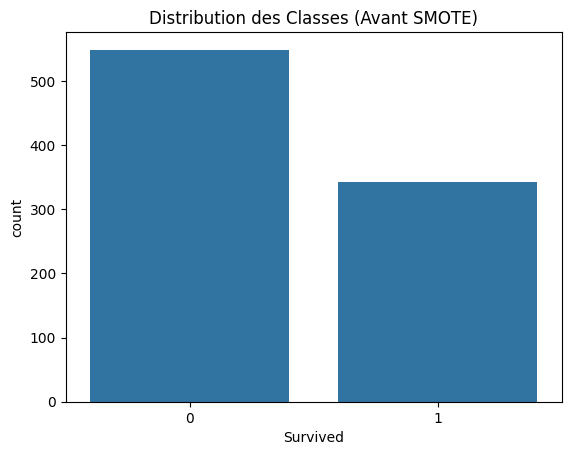

In [ ]:
class_counts = gym['Survived'].value_counts()
print("Distribution des classes avant SMOTE :")
print(class_counts)

# Visualiser la distribution des classes
sns.countplot(x='Survived', data=gym)
plt.title('Distribution des Classes (Avant SMOTE)')
plt.show()

Distribution des classes avant SMOTE :
Survived
0    549
1    342
Name: count, dtype: int64


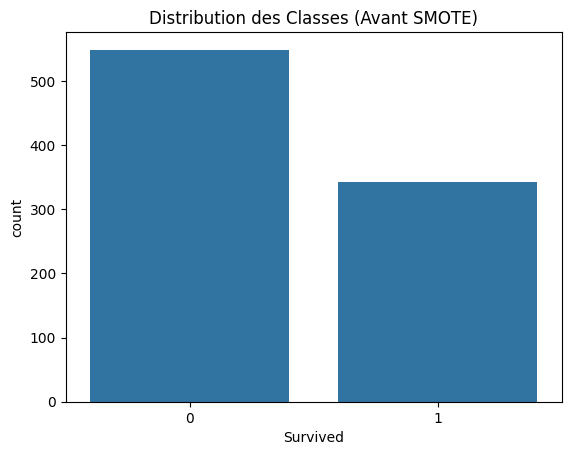

In [ ]:
class_counts = gym['Survived'].value_counts()
print("Distribution des classes avant SMOTE :")
print(class_counts)

# Visualize
sns.countplot(x='Survived', data=gym)
plt.title('Distribution des Classes (Avant SMOTE)')
plt.show()

In [ ]:
!pip install imblearn
import pandas as pd
from imblearn.over_sampling import SMOTE
import numpy as np # Import numpy for using np.nan


# Assuming 'gym' is your DataFrame
# Drop non-numeric columns before applying SMOTE
X = gym.select_dtypes(include=['number']).drop('Survived', axis=1)  # Keep only numeric features and drop target variable
y = gym['Survived']

# Impute missing values with the mean
# (you can choose other imputation methods like median or mode)
for col in X.columns:
    X[col] = X[col].fillna(X[col].mean())

# Check if any NaNs or infinities remain after imputation
# Replace infinite values with a large finite value
X = X.replace([np.inf, -np.inf], np.nanmax(X[X != np.inf]))

# Impute any remaining NaNs after handling infinities
X = X.fillna(X.mean())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Now you can proceed with the rest of your code
new_class_counts = y_resampled.value_counts()
print("Distribution des classes après SMOTE :")
print(new_class_counts)

Distribution des classes après SMOTE :
Survived
0    549
1    549
Name: count, dtype: int64


Part 4: Categorical Encoding
Select a Categorical Column:

Choose a categorical column (e.g., 'Sex', 'Embarked') that you want to work on.
Apply Categorical Encoding:

Apply at least two different encoding techniques on the selected column. For example:
Label Encoding: Converts categorical labels into numeric values by assigning a unique number to each class.
Frequency Encoding: Assigns each category a value based on its frequency in the dataset.
One-Hot Encoding:

Apply One-Hot Encoding on the categorical column. This technique creates binary columns for each category, with a '1' representing the presence of the category and '0' for its absence.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Step 1
categorical_column = 'Sex'

In [ ]:
# Step 2
label_encoder = LabelEncoder()
gym['Sex_label_encoded'] = label_encoder.fit_transform(gym[categorical_column])

In [ ]:
# Show Label Encoding
print("\nLabel Encoding :")
print(gym[['Sex', 'Sex_label_encoded']].head())


Label Encoding :
      Sex  Sex_label_encoded
0    male                  1
1  female                  0
2  female                  0
3  female                  0
4    male                  1


In [ ]:
# Step 3
frequency_encoding = gym[categorical_column].value_counts(normalize=True).to_dict()
gym['Sex_frequency_encoded'] = gym[categorical_column].map(frequency_encoding)

In [ ]:
# Show Frequency Encoding
print("\nFrequency Encoding :")
print(gym[['Sex', 'Sex_frequency_encoded']].head())


Frequency Encoding :
      Sex  Sex_frequency_encoded
0    male               0.647587
1  female               0.352413
2  female               0.352413
3  female               0.352413
4    male               0.647587


In [ ]:
# Étape 4 :  One-Hot Encoding
gym_one_hot_encoded = pd.get_dummies(gym, columns=[categorical_column], prefix=categorical_column)

# Afficher les résultats du One-Hot Encoding
print("\nOne-Hot Encoding :")
print(gym_one_hot_encoded.head())


One-Hot Encoding :
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin Embarked  Age_mean_imputed  \
0         A/5 21171   7.2500   NaN        S              22.0   
1          PC 17599  71.2833   C85        C              38.0   
2  STON/O2. 3101282   7.9250   NaN        S              26.0   
3            113803  53.1000  C123        S   